In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.mixture  import GaussianMixture 
from sklearn.metrics import davies_bouldin_score, silhouette_score

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

## Functions for further use

### Visualization of the clusters

In [209]:
def visualize_clusters(X, y_pred, method):
    plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c = 'red', label = 'Cluster 1')
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c = 'green', label = 'Cluster 3')
    plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], c = 'yellow', label = 'Cluster 4')
    plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], c = 'pink', label = 'Cluster 5')
    plt.scatter(X[y_pred == 5, 0], X[y_pred == 5, 1], c = 'orange', label = 'Cluster 6')
    plt.scatter(X[y_pred == 6, 0], X[y_pred == 6, 1], c = 'brown', label = 'Cluster 7')
    plt.scatter(X[y_pred == 7, 0], X[y_pred == 7, 1], c = 'purple', label = 'Cluster 8')
    plt.scatter(X[y_pred == 8, 0], X[y_pred == 8, 1], c = 'black', label = 'Cluster 9')
    plt.scatter(X[y_pred == 9, 0], X[y_pred == 9, 1], c = 'sienna', label = 'Cluster 10')
    plt.scatter(X[y_pred == 10, 0], X[y_pred == 10, 1], c = 'springgreen', label = 'Cluster 11')
    plt.scatter(X[y_pred == 11, 0], X[y_pred == 11, 1], c = 'bisque', label = 'Cluster 12')
    plt.scatter(X[y_pred == 12, 0], X[y_pred == 12, 1], c = 'olivedrab', label = 'Cluster 13')
    plt.scatter(X[y_pred == 13, 0], X[y_pred == 13, 1], c = 'tomato', label = 'Cluster 14')
    plt.scatter(X[y_pred == 14, 0], X[y_pred == 14, 1], c = 'honeydew', label = 'Cluster 15')
    plt.scatter(X[y_pred == 15, 0], X[y_pred == 15, 1], c = 'plum', label = 'Cluster 16')
    plt.scatter(X[y_pred == 16, 0], X[y_pred == 16, 1], c = 'crimson', label = 'Cluster 17')
    plt.scatter(X[y_pred == 17, 0], X[y_pred == 17, 1], c = 'darkgreen', label = 'Cluster 18')
    plt.scatter(X[y_pred == 18, 0], X[y_pred == 18, 1], c = 'violet', label = 'Cluster 19')
    plt.scatter(X[y_pred == 19, 0], X[y_pred == 19, 1], c = 'khaki', label = 'Cluster 20')
    if method != 'Gaussian Mixture' and method != 'DBScan':
        plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 300, c = 'cyan', label = 'centroids')
    plt.title('Cluster of songs by audio features')
    plt.xlabel('Danceability')
    plt.ylabel('Energy')
    plt.legend()
    plt.show()

In [175]:
def calculate_metrics(df, X, labels):
    db_score = davies_bouldin_score(X, labels)
    sh_score = silhouette_score(X, labels, metric='euclidean')
    df.loc[method] = [db_score, sh_score]

In [176]:
def commas_to_number(strnum):
    strlist = str(strnum).split(',')
    strjoined = ""
    for each_literal in strlist:
        strjoined += each_literal
    return (int(strjoined))

In [208]:
def visualize_clusters_3D(X, y_pred, method):
    cluster_df = pd.DataFrame(X, columns = ['Popularity', 'Danceability', 'Energy'])
    cluster_df['y_pred'] = y_pred
    display(cluster_df)
    fig = px.scatter_3d(cluster_df, x = 'Popularity', y='Danceability', z='Energy',
              color='y_pred', opacity = 0.8, size='Popularity', size_max=30)
    fig.show()

## Data description and  data import

In [177]:
df = pd.read_csv(r'spotify_dataset.csv')
df

Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name     Streams  \
0      2021-07-23--2021-07-30                             Beggin'  48,633,449   
1      2021-07-23--2021-07-30           STAY (with Justin Bieber)  47,248,719   
2      2021-06-25--2021-07-02                            good 4 u  40,162,559   
3      2021-07-02--2021-07-09                          Bad Habits  37,799,456   
4      2021-07-23--2021-07-30   INDUSTRY BABY (feat. Jack Harlow)  33,948,454   
...                       ...                                 ...         ...   
1551   2019-12-27--2020-01-03                           New Rules   4,630,675   
1552   2019-12-27--2020-01-03                  Cheirosa - Ao Vivo   4,623,030   
1553   2019-12-27--2020-01-03           Havana (feat. Young Thug)   4,620,876   
1554   2019-12-27--2020-01-03          Surtada - Remix Brega Funk   4,607,385   
1555   2019-12-27--2020-01-03  Lover (Remix) [feat. Shawn Mendes]   4,595,450   

                             Artist Artist Followers                 Song ID  \
0                          Måneskin          3377762  3Wrjm47oTz2sjIgck11l5e   
1                     The Kid LAROI          2230022  5HCyWlXZPP0y6Gqq8TgA20   
2                    Olivia Rodrigo          6266514  4ZtFanR9U6ndgddUvNcjcG   
3                        Ed Sheeran         83293380  6PQ88X9TkUIAUIZJHW2upE   
4                         Lil Nas X          5473565  27NovPIUIRrOZoCHxABJwK   
...                             ...              ...                     ...   
1551                       Dua Lipa         27167675  2ekn2ttSfGqwhhate0LSR0   
1552                 Jorge & Mateus         15019109  2PWjKmjyTZeDpmOUa3a5da   
1553                 Camila Cabello         22698747  1rfofaqEpACxVEHIZBJe6W   
1554  Dadá Boladão, Tati Zaqui, OIK           208630  5F8ffc8KWKNawllr5WsW0r   
1555                   Taylor Swift         42227614  3i9UVldZOE0aD0JnyfAZZ0   

                                                  Genre  ... Danceability  \
0                ['indie rock italiano', 'italian pop']  ...        0.714   
1                                ['australian hip hop']  ...        0.591   
2                                               ['pop']  ...        0.563   
3                                     ['pop', 'uk pop']  ...        0.808   
4                         ['lgbtq+ hip hop', 'pop rap']  ...        0.736   
...                                                 ...  ...          ...   
1551                     ['dance pop', 'pop', 'uk pop']  ...        0.762   
1552           ['sertanejo', 'sertanejo universitario']  ...        0.528   
1553  ['dance pop', 'electropop', 'pop', 'post-teen ...  ...        0.765   
1554                     ['brega funk', 'funk carioca']  ...        0.832   
1555                           ['pop', 'post-teen pop']  ...        0.448   

     Energy Loudness Speechiness Acousticness Liveness    Tempo Duration (ms)  \
0       0.8   -4.808      0.0504        0.127    0.359  134.002        211560   
1     0.764   -5.484      0.0483       0.0383    0.103  169.928        141806   
2     0.664   -5.044       0.154        0.335   0.0849  166.928        178147   
3     0.897   -3.7

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [179]:
df.describe()

Index  Highest Charting Position  Number of Times Charted
count  1556.000000                1556.000000              1556.000000
mean    778.500000                  87.744216                10.668380
std     449.322824                  58.147225                16.360546
min       1.000000                   1.000000                 1.000000
25%     389.750000                  37.000000                 1.000000
50%     778.500000                  80.000000                 4.000000
75%    1167.250000                 137.000000                12.000000
max    1556.000000                 200.000000               142.000000

In [180]:
# Find missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
display(missing_value_df)

column_name  percent_missing
Index                                          Index              0.0
Highest Charting Position  Highest Charting Position              0.0
Number of Times Charted      Number of Times Charted              0.0
Week of Highest Charting    Week of Highest Charting              0.0
Song Name                                  Song Name              0.0
Streams                                      Streams              0.0
Artist                                        Artist              0.0
Artist Followers                    Artist Followers              0.0
Song ID                                      Song ID              0.0
Genre                                          Genre              0.0
Release Date                            Release Date              0.0
Weeks Charted                          Weeks Charted              0.0
Popularity                                Popularity              0.0
Danceability                            Danceability              0.0
Energy                                        Energy              0.0
Loudness                                    Loudness              0.0
Speechiness                              Speechiness              0.0
Acousticness                            Acousticness              0.0
Liveness                                    Liveness              0.0
Tempo                                          Tempo              0.0
Duration (ms)                          Duration (ms)              0.0
Valence                                      Valence              0.0
Chord                                          Chord              0.0

In [181]:
# Count unique values of all categorical columns
categorical_cols = ['Index','Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'Song Name', 'Streams', 'Artist', 'Artist Followers',
                   'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Chord']
cat_cols_unique_counts_df = pd.DataFrame(columns = ['UniqueValuesCount'], index = categorical_cols)
for col in categorical_cols:
    cat_cols_unique_counts_df.loc[col] = df[col].nunique()
display(cat_cols_unique_counts_df)

UniqueValuesCount
Index                                  1556
Highest Charting Position               200
Number of Times Charted                  75
Week of Highest Charting                 83
Song Name                              1556
Streams                                1556
Artist                                  716
Artist Followers                        600
Song ID                                1517
Genre                                   395
Release Date                            478
Weeks Charted                           775
Popularity                               70
Danceability                            530
Energy                                  575
Loudness                               1394
Speechiness                             772
Acousticness                            965
Liveness                                606
Tempo                                  1461
Duration (ms)                          1486
Valence                                 732
Chord                                    13

## Preprocessing

In [182]:
# Drop irrelevent columns
clean_df = df.drop(columns = ['Index','Weeks Charted','Chord','Release Date','Week of Highest Charting','Song ID','Genre'],axis=1)
clean_df.head(10)

Highest Charting Position  Number of Times Charted  \
0                          1                        8   
1                          2                        3   
2                          1                       11   
3                          3                        5   
4                          5                        1   
5                          1                       18   
6                          3                       16   
7                          2                       10   
8                          3                        8   
9                          8                       10   

                           Song Name     Streams          Artist  \
0                            Beggin'  48,633,449        Måneskin   
1          STAY (with Justin Bieber)  47,248,719   The Kid LAROI   
2                           good 4 u  40,162,559  Olivia Rodrigo   
3                         Bad Habits  37,799,456      Ed Sheeran   
4  INDUSTRY BABY (feat. Jack Harlow)  33,948,454       Lil Nas X   
5     MONTERO (Call Me By Your Name)  30,071,134       Lil Nas X   
6           Kiss Me More (feat. SZA)  29,356,736        Doja Cat   
7                         Todo De Ti  26,951,613  Rauw Alejandro   
8                           Yonaguni  25,030,128       Bad Bunny   
9              I WANNA BE YOUR SLAVE  24,551,591        Måneskin   

  Artist Followers Popularity Danceability Energy Loudness Speechiness  \
0          3377762        100        0.714    0.8   -4.808      0.0504   
1          2230022         99        0.591  0.764   -5.484      0.0483   
2          6266514         99        0.563  0.664   -5.044       0.154   
3         83293380         98        0.808  0.897   -3.712      0.0348   
4          5473565         96        0.736  0.704   -7.409      0.0615   
5          5473565         97         0.61  0.508   -6.682       0.152   
6          8640063         94        0.762  0.701   -3.541      0.0286   
7          6080597         95         0.78  0.718   -3.605      0.0506   
8         36142273         96        0.644  0.648   -4.601       0.118   
9          3377762         95         0.75  0.608   -4.008      0.0387   

  Acousticness Liveness    Tempo Duration (ms) Valence  
0        0.127    0.359  134.002        211560   0.589  
1       0.0383    0.103  169.928        141806   0.478  
2        0.335   0.0849  166.928        178147   0.688  
3       0.0469    0.364  126.026        231041   0.591  
4       0.0203   0.0501  149.995        212000   0.894  
5        0.297    0.384  178.818        137876   0.758  
6        0.235    0.123  110.968        208867   0.742  
7         0.31   0.0932  127.949        199604   0.342  
8        0.276    0.135  179.951        206710    0.44  
9      0.00165    0.178  132.507        173347   0.958

In [183]:
# Convert object columns to float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']

In [184]:
for each_col in object_cols:
    clean_df[each_col] = pd.to_numeric(clean_df[each_col], errors='coerce')

clean_df.isnull().sum()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Song Name                  1556 non-null   object 
 3   Streams                    1556 non-null   object 
 4   Artist                     1556 non-null   object 
 5   Artist Followers           1545 non-null   float64
 6   Popularity                 1545 non-null   float64
 7   Danceability               1545 non-null   float64
 8   Energy                     1545 non-null   float64
 9   Loudness                   1545 non-null   float64
 10  Speechiness                1545 non-null   float64
 11  Acousticness               1545 non-null   float64
 12  Liveness                   1545 non-null   float64
 13  Tempo                      1545 non-null   float

In [185]:
# Convert Loudness to postive 40 scale.
clean_df['Loudness'] = 40 + clean_df['Loudness']
clean_df['Loudness'].head(10)

0    35.192
1    34.516
2    34.956
3    36.288
4    32.591
5    33.318
6    36.459
7    36.395
8    35.399
9    35.992
Name: Loudness, dtype: float64

In [186]:
# Drop na columns
clean_df = clean_df.dropna()
clean_df.describe()

Highest Charting Position  Number of Times Charted  Artist Followers  \
count                1545.000000              1545.000000      1.545000e+03   
mean                   87.825243                10.684142      1.471690e+07   
std                    58.132046                16.389761      1.667579e+07   
min                     1.000000                 1.000000      4.883000e+03   
25%                    37.000000                 1.000000      2.123734e+06   
50%                    80.000000                 4.000000      6.852509e+06   
75%                   137.000000                12.000000      2.269875e+07   
max                   200.000000               142.000000      8.333778e+07   

        Popularity  Danceability       Energy     Loudness  Speechiness  \
count  1545.000000   1545.000000  1545.000000  1545.000000  1545.000000   
mean     70.089320      0.689997     0.633495    33.651526     0.123656   
std      15.824034      0.142444     0.161577     2.509281     0.110383   
min       0.000000      0.150000     0.054000    14.834000     0.023200   
25%      65.000000      0.599000     0.532000    32.509000     0.045600   
50%      73.000000      0.707000     0.642000    34.010000     0.076500   
75%      80.000000      0.796000     0.752000    35.289000     0.165000   
max     100.000000      0.980000     0.970000    41.509000     0.884000   

       Acousticness     Liveness        Tempo  Duration (ms)      Valence  
count   1545.000000  1545.000000  1545.000000    1545.000000  1545.000000  
mean       0.248695     0.181202   122.811023  197940.816828     0.514704  
std        0.250326     0.144071    29.591088   47148.930420     0.227326  
min        0.000025     0.019700    46.718000   30133.000000     0.032000  
25%        0.048500     0.096600    97.960000  169266.000000     0.343000  
50%        0.161000     0.124000   122.012000  193591.000000     0.512000  
75%        0.388000     0.217000   143.860000  218902.000000     0.691000  
max        0.994000     0.962000   205.272000  588139.000000     0.979000

In [228]:
# Clean streams column from commas

clean_df['Streams'] = clean_df['Streams'].apply(commas_to_number)
clean_df['Streams'].head(10)

0    48633449
1    47248719
2    40162559
3    37799456
4    33948454
5    30071134
6    29356736
7    26951613
8    25030128
9    24551591
Name: Streams, dtype: int64

In [188]:
clean_df.describe()

Highest Charting Position  Number of Times Charted       Streams  \
count                1545.000000              1545.000000  1.545000e+03   
mean                   87.825243                10.684142  6.337136e+06   
std                    58.132046                16.389761  3.375402e+06   
min                     1.000000                 1.000000  4.176083e+06   
25%                    37.000000                 1.000000  4.915080e+06   
50%                    80.000000                 4.000000  5.269163e+06   
75%                   137.000000                12.000000  6.452492e+06   
max                   200.000000               142.000000  4.863345e+07   

       Artist Followers   Popularity  Danceability       Energy     Loudness  \
count      1.545000e+03  1545.000000   1545.000000  1545.000000  1545.000000   
mean       1.471690e+07    70.089320      0.689997     0.633495    33.651526   
std        1.667579e+07    15.824034      0.142444     0.161577     2.509281   
min        4.883000e+03     0.000000      0.150000     0.054000    14.834000   
25%        2.123734e+06    65.000000      0.599000     0.532000    32.509000   
50%        6.852509e+06    73.000000      0.707000     0.642000    34.010000   
75%        2.269875e+07    80.000000      0.796000     0.752000    35.289000   
max        8.333778e+07   100.000000      0.980000     0.970000    41.509000   

       Speechiness  Acousticness     Liveness        Tempo  Duration (ms)  \
count  1545.000000   1545.000000  1545.000000  1545.000000    1545.000000   
mean      0.123656      0.248695     0.181202   122.811023  197940.816828   
std       0.110383      0.250326     0.144071    29.591088   47148.930420   
min       0.023200      0.000025     0.019700    46.718000   30133.000000   
25%       0.045600      0.048500     0.096600    97.960000  169266.000000   
50%       0.076500      0.161000     0.124000   122.012000  193591.000000   
75%       0.165000      0.388000     0.217000   143.860000  218902.000000   
max       0.884000      0.994000     0.962000   205.272000  588139.000000   

           Valence  
count  1545.000000  
mean      0.514704  
std       0.227326  
min       0.032000  
25%       0.343000  
50%       0.512000  
75%       0.691000  
max       0.979000

## Exploratory Data Analysis

<Figure size 720x720 with 0 Axes>

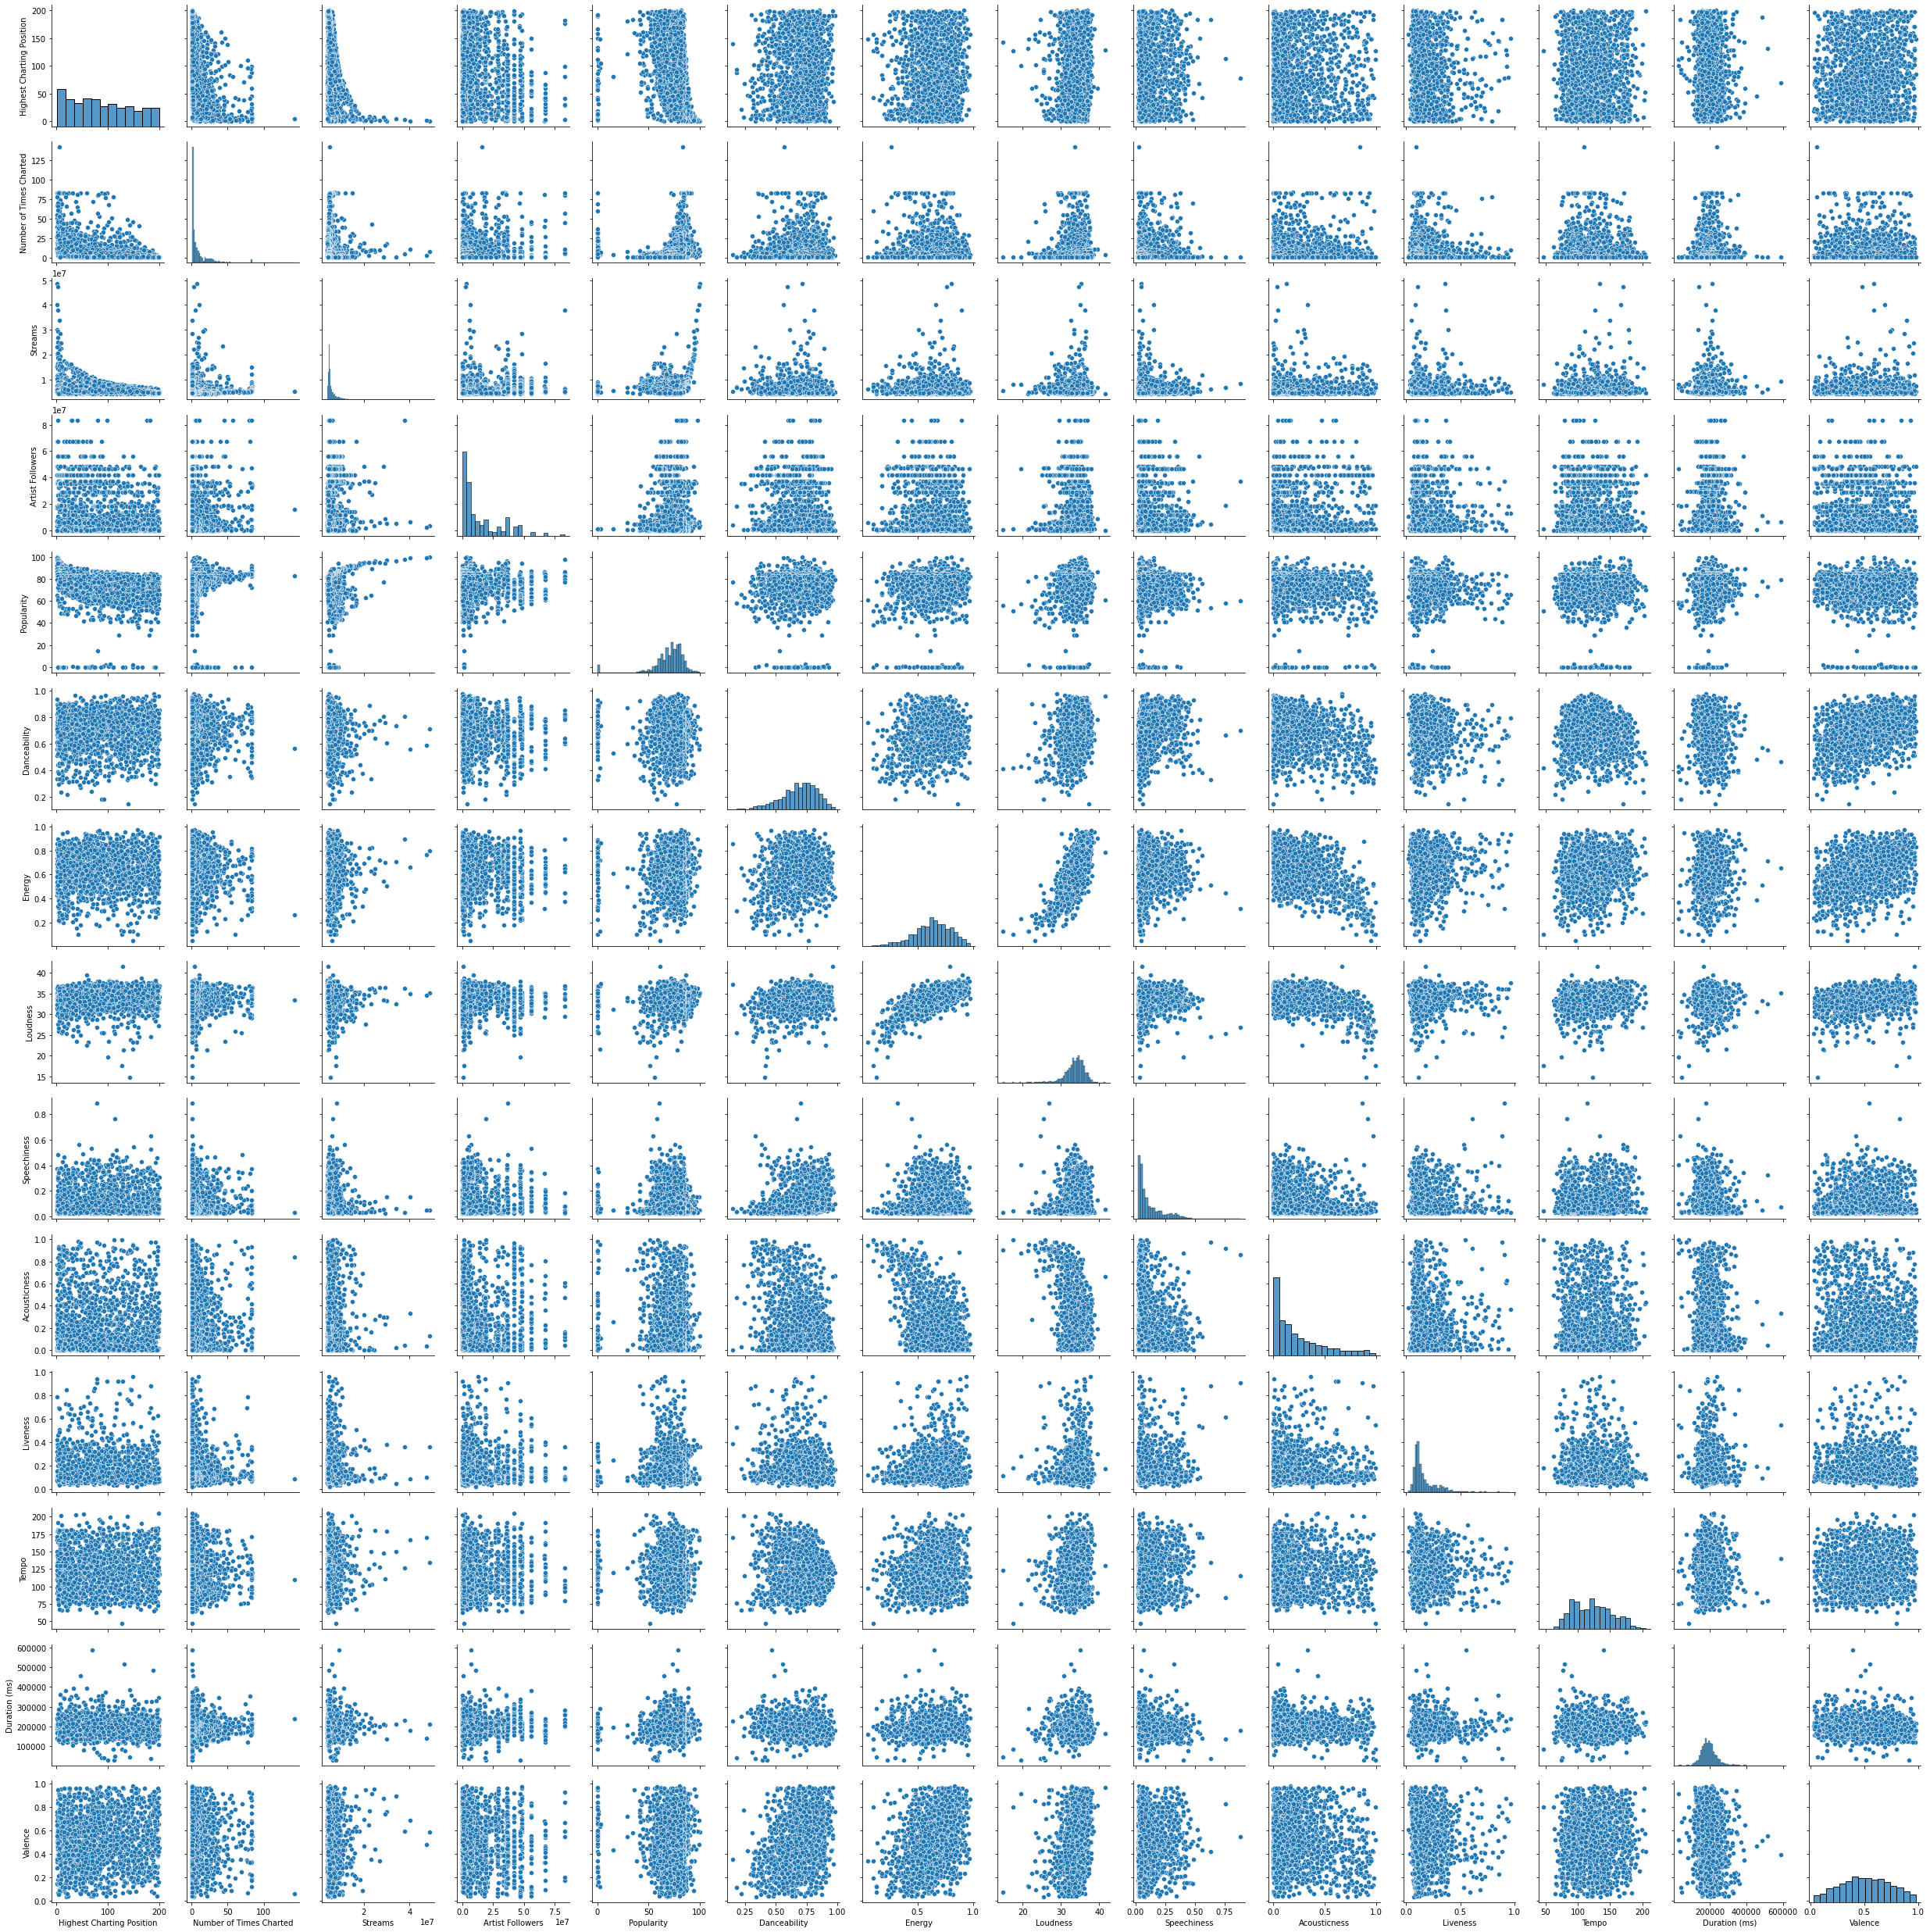

In [189]:
# Exploratory data analytics
plt.figure(figsize=(10, 10))
sns.pairplot(clean_df)
plt.show()

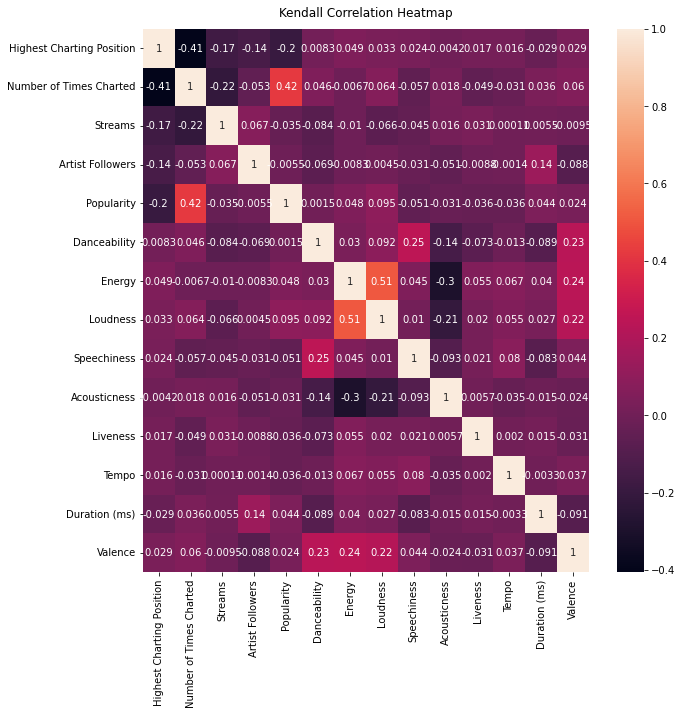

In [190]:
# Draw the correlation heatmaps using seaborn
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(clean_df.corr(method='kendall'), annot=True)
heatmap.set_title('Kendall Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

## Get features for clustering

In [191]:
clean_df

Highest Charting Position  Number of Times Charted  \
0                             1                        8   
1                             2                        3   
2                             1                       11   
3                             3                        5   
4                             5                        1   
...                         ...                      ...   
1551                        195                        1   
1552                        196                        1   
1553                        197                        1   
1554                        198                        1   
1555                        199                        1   

                               Song Name   Streams  \
0                                Beggin'  48633449   
1              STAY (with Justin Bieber)  47248719   
2                               good 4 u  40162559   
3                             Bad Habits  37799456   
4      INDUSTRY BABY (feat. Jack Harlow)  33948454   
...                                  ...       ...   
1551                           New Rules   4630675   
1552                  Cheirosa - Ao Vivo   4623030   
1553           Havana (feat. Young Thug)   4620876   
1554          Surtada - Remix Brega Funk   4607385   
1555  Lover (Remix) [feat. Shawn Mendes]   4595450   

                             Artist  Artist Followers  Popularity  \
0                          Måneskin         3377762.0       100.0   
1                     The Kid LAROI         2230022.0        99.0   
2                    Olivia Rodrigo         6266514.0        99.0   
3                        Ed Sheeran        83293380.0        98.0   
4                         Lil Nas X         5473565.0        96.0   
...                             ...               ...         ...   
1551                       Dua Lipa        27167675.0        79.0   
1552                 Jorge & Mateus        15019109.0        66.0   
1553                 Camila Cabello        22698747.0        81.0   
1554  Dadá Boladão, Tati Zaqui, OIK          208630.0        60.0   
1555                   Taylor Swift        42227614.0        70.0   

      Danceability  Energy  Loudness  Speechiness  Acousticness  Liveness  \
0            0.714   0.800    35.192       0.0504       0.12700    0.3590   
1            0.591   0.764    34.516       0.0483       0.03830    0.1030   
2            0.563   0.664    34.956       0.1540       0.33500    0.0849   
3            0.808   0.897    36.288       0.0348       0.04690    0.3640   
4            0.736   0.704    32.591       0.0615       0.02030    0.0501   
...            ...     ...       ...          ...           ...       ...   
1551         0.762   0.700    33.979       0.0694       0.00261    0.1530   
1552         0.528   0.870    36.877       0.0851       0.24000    0.3330   
1553         0.765   0.523    35.667       0.0300       0.18400    0.1320   
1554         0.832   0.550    32.974       0.0587       0.24900    0.1820   
1555         0.448   0.603    32.824       0.0640       0.43300    0.0862   

        Tempo  Duration (ms)  Valence  
0     134.002       211560.0    0.589  
1     169.928       141806.0    0.478  
2     166.928       178147.0    0.688  
3     126.026       231041.0    0.591  
4     149.995       212000.0    0.894  
...       ...            ...      ...  
1551  116.073       209320.0    0.608  
1552  152.370       181930.0    0.714  
1553  104.988       217307.0    0.394  
1554  154.064       152784.0    0.881  
1555  205.272       221307.0    0.422  

[1545 rows x 16 columns]

In [210]:
X = clean_df.iloc[:,[6,7,8]].values
display(pd.DataFrame(X))

0      1      2
0     100.0  0.714  0.800
1      99.0  0.591  0.764
2      99.0  0.563  0.664
3      98.0  0.808  0.897
4      96.0  0.736  0.704
...     ...    ...    ...
1540   79.0  0.762  0.700
1541   66.0  0.528  0.870
1542   81.0  0.765  0.523
1543   60.0  0.832  0.550
1544   70.0  0.448  0.603

[1545 rows x 3 columns]

## Scale the dataset

In [211]:
#Get the distribution plot of all columns
for col in X.T:
    hist_data = [col]
    group_labels = ['distplot'] 
    fig = ff.create_distplot(hist_data, group_labels)
    fig.show()

In [212]:
# Apply MinMax scaling
from sklearn.preprocessing import MinMaxScaler
mmsc_X = MinMaxScaler()
X = mmsc_X.fit_transform(X)
display(pd.DataFrame(X))

0         1         2
0     1.00  0.679518  0.814410
1     0.99  0.531325  0.775109
2     0.99  0.497590  0.665939
3     0.98  0.792771  0.920306
4     0.96  0.706024  0.709607
...    ...       ...       ...
1540  0.79  0.737349  0.705240
1541  0.66  0.455422  0.890830
1542  0.81  0.740964  0.512009
1543  0.60  0.821687  0.541485
1544  0.70  0.359036  0.599345

[1545 rows x 3 columns]

## Create dataframes for evaluation

In [213]:
# included methods/models and metrics
methods = ['K-Means', 'Mean Shift', 'Gaussian Mixture', 'DBScan']
metrics = ['Davis Bouldin', 'Silhoutte']

quality_df = pd.DataFrame(columns = metrics, index = methods)
display(quality_df)

Davis Bouldin Silhoutte
K-Means                    NaN       NaN
Mean Shift                 NaN       NaN
Gaussian Mixture           NaN       NaN
DBScan                     NaN       NaN

## K-Means clustering

### Using elbow method to find optimal number of clusters

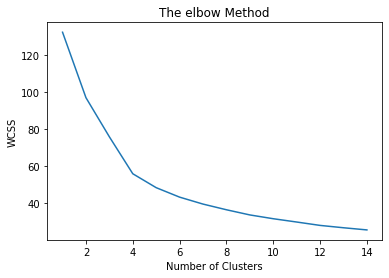

In [214]:
wcss = []
for i in range (1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title("The elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Applying k-means to dataset

In [215]:
model = KMeans(n_clusters = 6, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(X)
labels = y_pred
cluster_centers = model.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[0.02479167 0.65276104 0.5999818 ]
 [0.67820144 0.39806709 0.32136125]
 [0.70905882 0.77599575 0.49716799]
 [0.74062212 0.7810005  0.71659741]
 [0.73623656 0.49443797 0.60265922]
 [0.71967213 0.58285206 0.83859976]]
Number of estimated clusters: 6


## Evaluate the model

In [216]:
method = 'K-Means'
calculate_metrics(quality_df, X, labels)
display(quality_df)

Davis Bouldin Silhoutte
K-Means               1.109079  0.249666
Mean Shift                 NaN       NaN
Gaussian Mixture           NaN       NaN
DBScan                     NaN       NaN

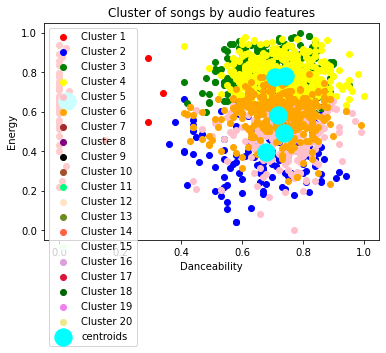

In [217]:
visualize_clusters(X, y_pred, method)

In [225]:
visualize_clusters_3D(X, y_pred, method)

Popularity  Danceability    Energy  y_pred
0           1.00      0.679518  0.814410       0
1           0.99      0.531325  0.775109       1
2           0.99      0.497590  0.665939       4
3           0.98      0.792771  0.920306       1
4           0.96      0.706024  0.709607       0
...          ...           ...       ...     ...
1540        0.79      0.737349  0.705240       0
1541        0.66      0.455422  0.890830       1
1542        0.81      0.740964  0.512009       2
1543        0.60      0.821687  0.541485       2
1544        0.70      0.359036  0.599345       4

[1545 rows x 4 columns]

## Mean Shift Clustering

### Find the bandwidth

In [218]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=30)
bandwidth

0.26280075909626904

## Build the model

In [219]:
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_pred = model.fit_predict(X)
labels = y_pred
cluster_centers = model.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[0.73143443 0.71183587 0.67303158]
 [0.00233333 0.69626506 0.69665211]
 [0.01       0.36385542 0.06877729]]
Number of estimated clusters: 3


## Evaluate the model

In [220]:
method = 'Mean Shift'
calculate_metrics(quality_df, X, labels)
display(quality_df)

Davis Bouldin Silhoutte
K-Means               1.109079  0.249666
Mean Shift            0.752598  0.498214
Gaussian Mixture           NaN       NaN
DBScan                     NaN       NaN

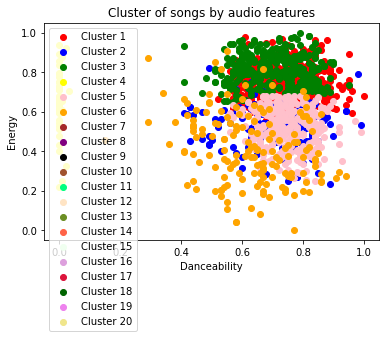

In [231]:
visualize_clusters(X, y_pred, method)

In [226]:
visualize_clusters_3D(X, y_pred, method)

Popularity  Danceability    Energy  y_pred
0           1.00      0.679518  0.814410       0
1           0.99      0.531325  0.775109       1
2           0.99      0.497590  0.665939       4
3           0.98      0.792771  0.920306       1
4           0.96      0.706024  0.709607       0
...          ...           ...       ...     ...
1540        0.79      0.737349  0.705240       0
1541        0.66      0.455422  0.890830       1
1542        0.81      0.740964  0.512009       2
1543        0.60      0.821687  0.541485       2
1544        0.70      0.359036  0.599345       4

[1545 rows x 4 columns]

## Gaussian Mixture Clustering

### Build the model

In [222]:
model = GaussianMixture(n_components=6)
y_pred = model.fit_predict(X)
labels = y_pred
n_clusters_ = len(np.unique(labels))

### Evaluate the model

In [223]:
method = 'Gaussian Mixture'
calculate_metrics(quality_df, X, labels)
display(quality_df)

Davis Bouldin Silhoutte
K-Means               1.109079  0.249666
Mean Shift            0.752598  0.498214
Gaussian Mixture      1.245951  0.235667
DBScan                     NaN       NaN

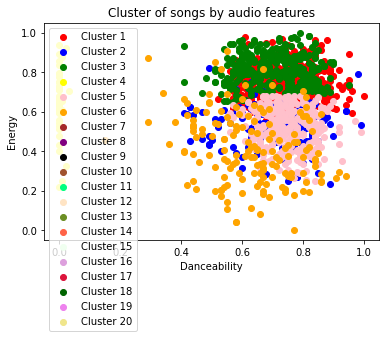

In [230]:
visualize_clusters(X, y_pred, method)

In [227]:
visualize_clusters_3D(X, y_pred, method)

Popularity  Danceability    Energy  y_pred
0           1.00      0.679518  0.814410       0
1           0.99      0.531325  0.775109       1
2           0.99      0.497590  0.665939       4
3           0.98      0.792771  0.920306       1
4           0.96      0.706024  0.709607       0
...          ...           ...       ...     ...
1540        0.79      0.737349  0.705240       0
1541        0.66      0.455422  0.890830       1
1542        0.81      0.740964  0.512009       2
1543        0.60      0.821687  0.541485       2
1544        0.70      0.359036  0.599345       4

[1545 rows x 4 columns]